In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load March and April files
march = pd.read_csv('pca_202503.csv')   # March 2025
april = pd.read_csv('CapstoneData.csv')  # April 2025 from your previous file


In [2]:
# Group by chemical substance
march_grouped = (
    march.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS']
    .sum()
    .reset_index()
    .rename(columns={'ITEMS': 'MARCH_ITEMS'})
)

april_grouped = (
    april.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS']
    .sum()
    .reset_index()
    .rename(columns={'ITEMS': 'APRIL_ITEMS'})
)


In [3]:
# Merge both months
compare = pd.merge(march_grouped, april_grouped, on='BNF_CHEMICAL_SUBSTANCE', how='outer').fillna(0)

# Calculate change and percentage change
compare['CHANGE'] = compare['APRIL_ITEMS'] - compare['MARCH_ITEMS']
compare['PCT_CHANGE'] = (compare['CHANGE'] / compare['MARCH_ITEMS'].replace(0, pd.NA)) * 100


In [4]:
# Largest increases
top_increase = compare.sort_values(by='CHANGE', ascending=False).head(10)

# Largest decreases
top_decrease = compare.sort_values(by='CHANGE').head(10)


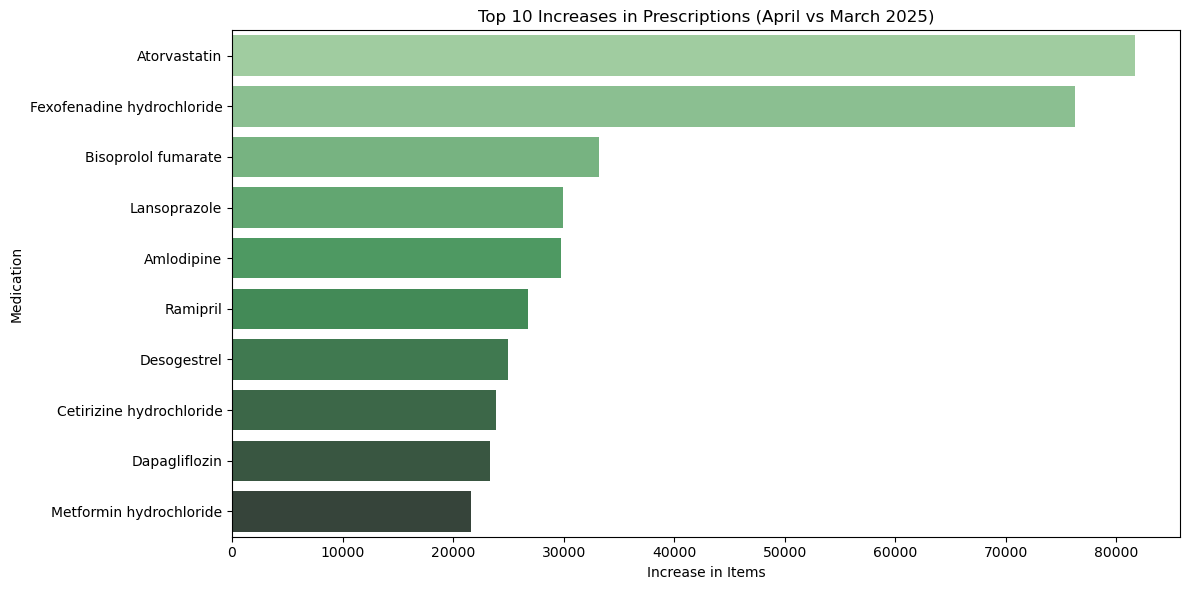

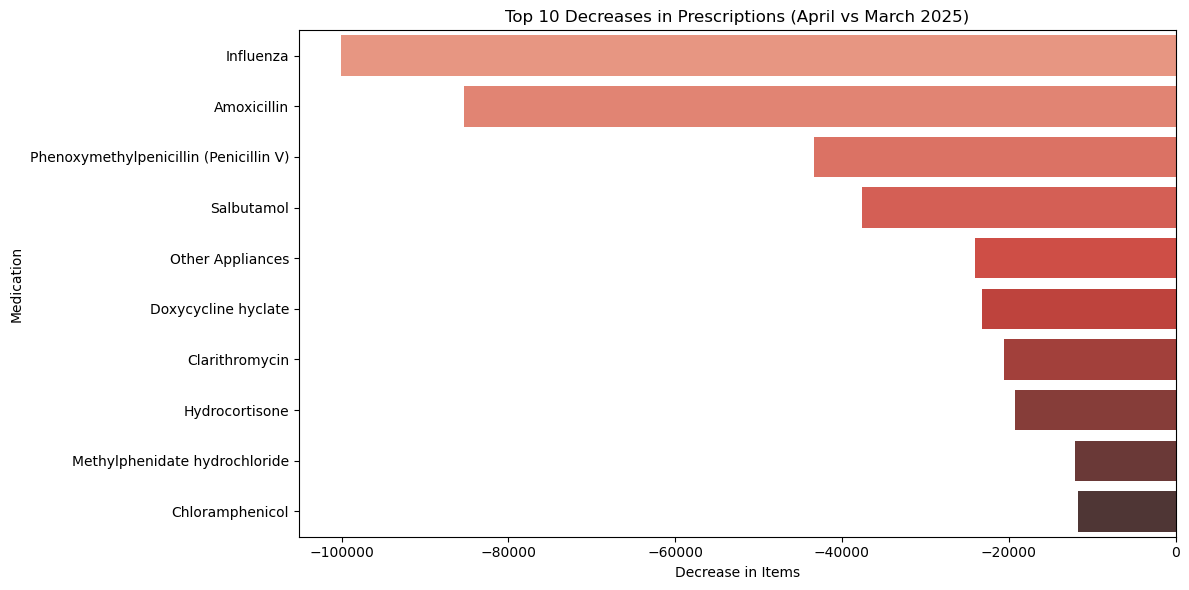

In [5]:
# Bar plot for top increases
plt.figure(figsize=(12, 6))
sns.barplot(data=top_increase, x='CHANGE', y='BNF_CHEMICAL_SUBSTANCE', palette='Greens_d')
plt.title('Top 10 Increases in Prescriptions (April vs March 2025)')
plt.xlabel('Increase in Items')
plt.ylabel('Medication')
plt.tight_layout()
plt.show()

# Bar plot for top decreases
plt.figure(figsize=(12, 6))
sns.barplot(data=top_decrease, x='CHANGE', y='BNF_CHEMICAL_SUBSTANCE', palette='Reds_d')
plt.title('Top 10 Decreases in Prescriptions (April vs March 2025)')
plt.xlabel('Decrease in Items')
plt.ylabel('Medication')
plt.tight_layout()
plt.show()
